# Chapter 2. Mathematical Plotting with Matplotlib

The main user interface of Matplotlib is the `matplotlib.pyplot` package, which, by convention, is imported under the `plt` alias.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Basic plotting

Most commonly, the data that you wish to plot will be store in two separate NumPy arrays, which will labal `x` and `y` for clarity. We will

- generate an array of `x` values, and
- use a function to generate the corresponding `y` values

$$
f(x) = x(x-2) e^{3-x}
$$

In [2]:
def f(x):
    return x*(x-2)*np.exp(3-x)

We need to create a set of the `x` values that cover the desired range. The `linspace` routine from NumPy is ideal for creating arrays of numbers for plotting. By default, it will create 50 equally spaced points between the specified arguments. 50 is sufficient for most cases.

In [3]:
x = np.linspace(-0.5, 3.0)
assert x[ 0] == -0.5
assert x[ 7] == 0.0
assert x[14] == 0.5
assert x[21] == 1.0
assert x[28] == 1.5
assert x[35] == 2.0
assert x[42] == 2.5
assert x[49] == 3.0

Once we have created the `x` values, we can generate the `y` values:

In [4]:
y = f(x)
assert y[ 7] == 0
assert np.isclose(y[21], -np.power(np.e, 2))
assert y[35] == 0
assert y[49] == 3

Call the `plot` routine from Matplotlib package to plot the data. The first argument is the `x` data and the second is the `y` data.

> Plotting interactively within a Jupyter notebook can be done with the `%matplotlib inline` command, which will lead to static images of your plot embedded in the notebook.

> The semicolon at the end of the last line is intentional; it suppresses the textual representation of the plot from the output.

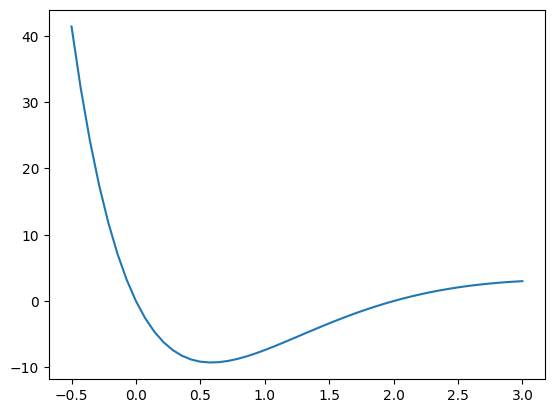

In [5]:
%matplotlib inline
plt.plot(x, y);

If there are currently no `Figure` or `Axes` objects, the `plt.plt` routine creates a new `Figure` object, adds a new `Axes` object to the figure, and populates this `Axes` object wit the plotted data.

The `pyplot.subplots` routine creates a new `Figure` object and explicitly creates a new set of axes in the figure together:

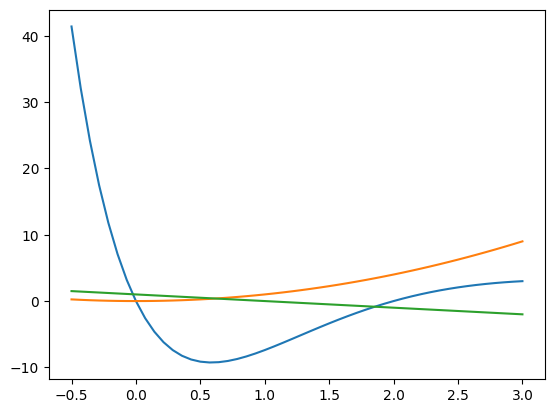

In [6]:
fig, ax = plt.subplots()
ax.plot(x, f(x))
ax.plot(x, x**2)
ax.plot(x, 1-x);

## Changing the plotting style

When calling `plt.plot`, we can specify the marker style but omit the line style, which means that no connecting line is drawn between adjacent data points. This is useful for plotting discrete data where no interpolation between points is necessary.

For the purposes of this demonstration, we will define the following data:

In [7]:
y1 = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y2 = np.array([1.2, 1.6, 3.1, 4.2, 4.8])
y3 = np.array([3.2, 1.1, 2.0, 4.9, 2.5])

Then create a new figure and plot the data on the figure:

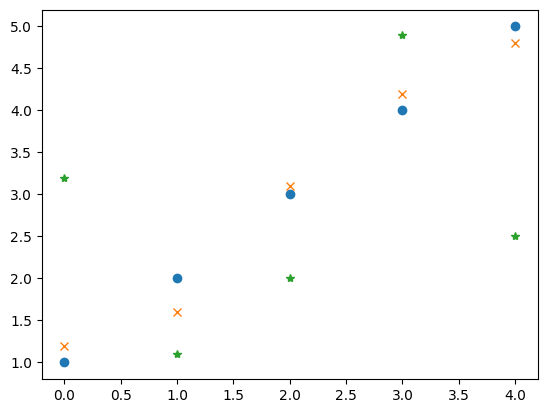

In [8]:
fig, ax = plt.subplots()
ax.plot(y1, 'o')
ax.plot(y2, 'x')
ax.plot(y3, '*');

Note that as the `x` data is not given to the `plot` calls, the points are plotted against their position in the array, that is, the `x` coordinate will be 0, 1, 2, 3, or 4, respectively, for each array.

The strings `'o'`, `'x'` and `'*'` in the `plot` calls are the [format strings](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). A format string consists of a part of color, marker and line:

```
fmt = '[marker][line][color]'
```

The `plot` method also accepts a number of keyword arguments that can also be used to control the style of a plot. Keyword arguments take precedence over format string parameters if both are present, and they apply to all sets of data plotted by the call.

- `marker`
- `linestyle` or `ls`
- `color` or `c`
- `linewidth` or `lw`

## Figures, Axes, and Line2D

Let's review the [`pyplot.subplots` method](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

```python
fig, ax  = plt.subplots()       # a single Axes object
fig, ax4 = plt.subplots(2,2)    # an array of Axes objects
```

The method returns

- a single `Figure` object, and
- a single `Axes` object or an array of `Axes` objects

You can put plots in an `Axes` object with the `Axes.plot` method: 

```python
ax.plot(y1, 'o')
ax.plot(y2, 'x')
ax.plot(y3, '*')
```

The [Figure class](https://matplotlib.org/stable/api/figure_api.html) is the top level container for all the plot elements.

- adding axes and sub-figures
- saving the figure to a file
- annotating
  - color bar
  - legend
  - text
  - super title
  - super x-label and y-label
- figure geometry
  - size, height & width
  - dots per inch
- subplot layout
  - the position of the left/right/top/bottom edge
  - the width/height of the padding between sub-plots
- modifying appearance
  - the figure's background patch
  - the line width of the figure rectangle
  - the face/edge color of the figure rectangle

The [Axes class](https://matplotlib.org/stable/api/axes_api.html) represents one (sub-)plot in a figure. It contains the plotted data, axis ticks, labels, title, legend, etc. Its methods are the main interface for manipulating the plot.

- axis / limits
  - axis limits and direction
  - axis labels, title, and legend
  - axis scales
  - auto-scaling and margins
  - aspect ratio
  - ticks and tick labels
- plotting
  - spans
  - spectral
  - statistics
  - binned
  - contours
  - 2D arrays
  - unstructured triangles
  - text and annotations
  - vector fields

The `Axes.plot` method returns a list of the [Line2D](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html) objects. Each `Line2D` object represents the dataset plotted by the call.

```python
fig, ax = plt.subplots()

line1, = ax.plot(y1, "o-")   # expecting a single-element list
xdata1, ydata1 = line1.get_data()
  assert np.all(xdata1 == [0., 1., 2., 3., 4.])
  assert np.all(ydata1 == [1.0, 2.0, 3.0, 4.0, 5.0])

lines = ax.plot(y2, "x--", y3, "*-.")
  assert len(lines) == 2
xdata2, ydata2 = lines[0].get_data()
  assert np.all(xdata2 == [0., 1., 2., 3., 4.])
  assert np.all(ydata2 == [1.2, 1.6, 3.1, 4.2, 4.8])
xdata3, ydata3 = lines[1].get_data()
  assert np.all(xdata3 == [0., 1., 2., 3., 4.])
  assert np.all(ydata3 == [3.2, 1.1, 2.0, 4.9, 2.5])
```

## Labels and legends

Every plot should have a title, and the axes should be properly labeled. For plots displaying multiple sets of data, legends are a good way to help the reader quickly identify the marker, the line, and the color of different datasets.

When you have plotted two ore more datasets, call the [Axes.legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html) method with an iterable of strings, one for each legend item.

```python
fig, ax = plt.subplots()
ax.plot(y1, "o-", y2, "x--", y3, "*-.")
ax.set_title("Plot of the data y1, y2, and y3")
ax.set_xlabel("x axis label")
ax.set_ylabel("y axis label")
ax.legend(("data y1", "data y2", "data y3"))
```

When you have plotted each dataset, call the `Axes.legend` method with a iterable of the `Line2D` objects. The labels of legend items are taken from the `label` property of the `Line2D` object.

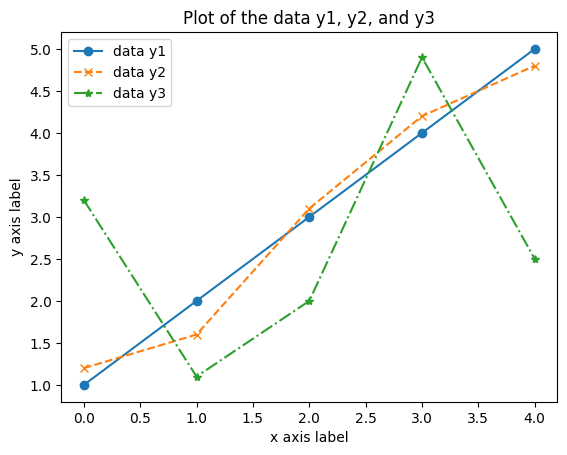

In [9]:
fig, ax = plt.subplots()
line1, = ax.plot(y1, "o-", label="data y1")
line2, = ax.plot(y2, "x--", label="data y2")
line3, = ax.plot(y3, "*-.", label="data y3")
ax.set_title("Plot of the data y1, y2, and y3")
ax.set_xlabel("x axis label")
ax.set_ylabel("y axis label")
ax.legend(handles=[line1, line2, line3]);

The [Axes class](https://matplotlib.org/stable/api/axes_api.html) contains the plotted data, axis ticks, labels, title, legend, etc. Its methods are the main interface for manipulating the plot.